In [6]:
import cv2
from scipy import ndimage
from scipy import misc
import numpy as np
import math as mtugh
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.feature import peak_local_max
from skimage import io
from skimage.draw import circle, ellipse_perimeter

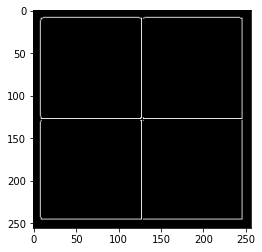

In [22]:
image = cv2.imread('./ps1-input0.png')
ps1_input0_edges = cv2.Canny(image, 100, 200, 1, 7, True) 

plt.imshow(ps1_input0_edges, cmap="gray")
plt.show()

In [32]:
x_indices, y_indices  = np.nonzero(np.ones([3,3]))
print(x_indices, y_indices)
for (x,y) in zip(x_indices, y_indices):
    print(x,y)

[0 0 0 1 1 1 2 2 2] [0 1 2 0 1 2 0 1 2]
0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


In [57]:
def hough(image):
    edges = cv2.Canny(image, 100,200,1,7,True)
    x_ind, y_ind = np.nonzero(edges)
    imW = edges.shape[0]
    imH = edges.shape[1]
    diag_len = np.ceil(np.sqrt(imW*imW + imH*imH))
    rho_range = int(2*diag_len)
    accumulator = np.zeros([rho_range,180])
    
    for (x,y) in zip(x_ind, y_ind):
        for theta in range(0,180):
            rho = int(np.round(x * np.cos(np.deg2rad(theta)) + y * np.sin(np.deg2rad(theta))) + diag_len)
            accumulator[rho,theta] += 1
    
    return accumulator

hough_accu = hough(image)
    

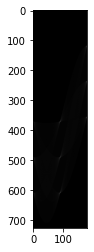

In [58]:
plt.imshow(hough_accu, cmap='gray')

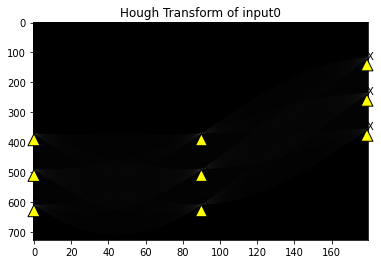

In [59]:
def peak_finding(hough_accu, min_distance = 45, max_peaks = 6, title ='Hough Transform', path = './trash.png'):

    coordinates = peak_local_max(hough_accu, min_distance=min_distance,
                                 exclude_border = False, num_peaks =max_peaks)
    loca_maxs_rho = coordinates[:, 0]
    loca_maxs_theta = coordinates[:, 1]
    plt.imshow(hough_accu, cmap='gray',aspect='auto')
    plt.title(title)

    # Annotate local maximum
    for i in range(len(loca_maxs_rho)):
        plt.annotate('X',xy=(loca_maxs_theta[i],loca_maxs_rho[i]), arrowprops=dict(facecolor='yellow', shrink=0.05),)
    plt.savefig(path)
    plt.show()
    return loca_maxs_rho, loca_maxs_theta

loca_maxs_rho, loca_maxs_theta = peak_finding(hough_accu, max_peaks=50, title='Hough Transform of input0', path = './output.png')

In [60]:

def draw_line(image, loca_maxs_theta, loca_maxs_rho, rgb = (0,255,0)):
    image_copy = image.copy()
    width = image_copy.shape[1]
    height = image_copy.shape[0]
    diag_len = np.ceil(np.sqrt(width * width + height * height)) 
    for j in range(len(loca_maxs_rho)):
        rho = loca_maxs_rho[j] - diag_len
        theta = loca_maxs_theta[j]
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))
        x1=int(a*rho - diag_len*b) 
        y1=int(b*rho + diag_len*a)
        x2=int(a*rho + diag_len*b)
        y2=int(b*rho - diag_len*a)
        #print(x1,y1,x2,y2)
        cv2.line(image_copy, (x1,y1),(x2,y2), rgb, 3) # green line
        #print('Line {} | rho = {} theta = {}'.format(j,loca_maxs_rho[j], loca_maxs_theta[j]))
        plt.imshow(image_copy)
        plt.title('Detected Line')

    plt.show()
    return image_copy

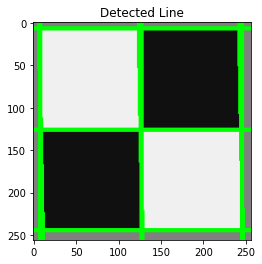

array([[[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       ...,

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]]

In [61]:
draw_line(image, loca_maxs_theta, loca_maxs_rho)